<a href="https://colab.research.google.com/github/brranitha/ML-Models/blob/main/Bike_Sharing_Demand_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data
bike_data = pd.read_csv('/content/Bike_Sharing_Train.csv')

In [3]:
print(bike_data.shape)
print(bike_data.info())
print(bike_data.describe)
print(bike_data.head())
print(bike_data.columns)

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
<bound method NDFrame.describe of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0        

In [4]:
#checking for null data
bike_data.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [5]:
bike_data['datetime'] = pd.to_datetime(bike_data['datetime'])
bike_data['hour'] = bike_data['datetime'].dt.hour
bike_data['day'] = bike_data['datetime'].dt.day
bike_data['month'] = bike_data['datetime'].dt.month

In [6]:
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [7]:
bike_data.drop(columns=['datetime','registered','casual'],axis=1,inplace=True)

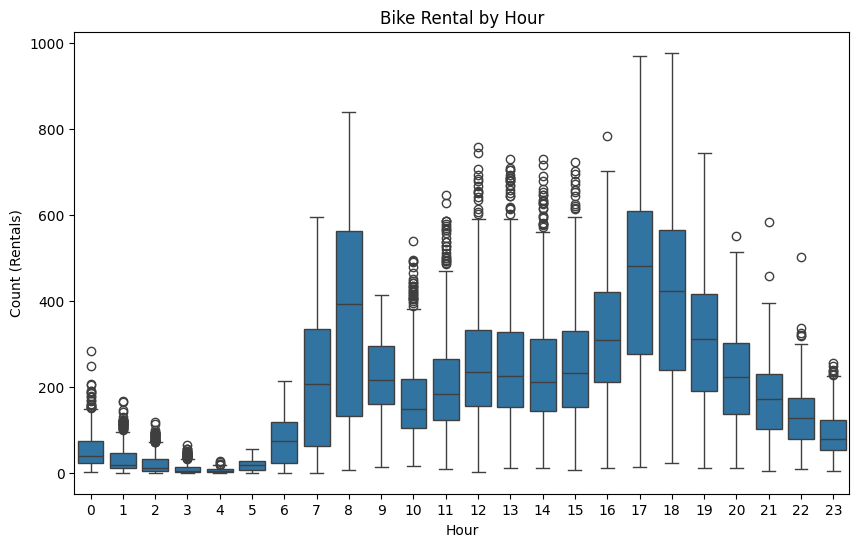

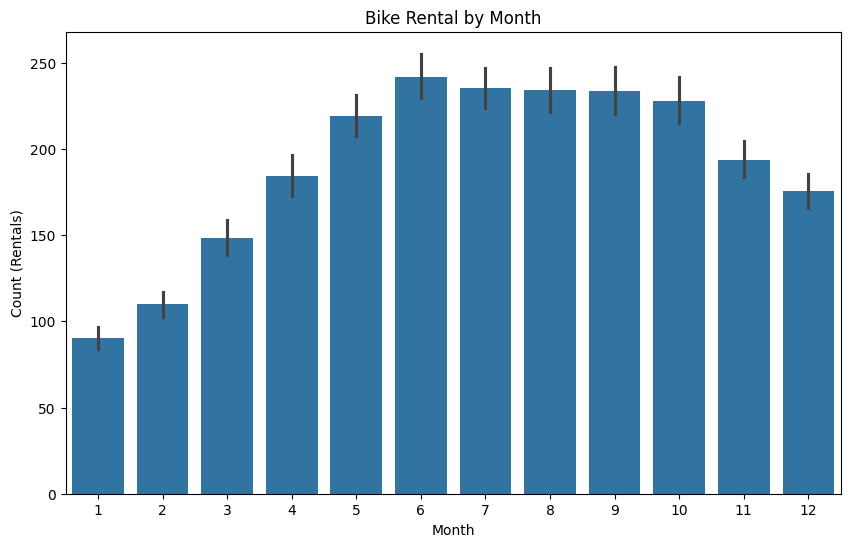

In [8]:
#Rental count by Hour
plt.figure(figsize=(10,6))
sns.boxplot(x='hour',y='count',data=bike_data)
plt.title("Bike Rental by Hour")
plt.xlabel('Hour')
plt.ylabel('Count (Rentals)')
plt.show()

#monthly trend
plt.figure(figsize=(10,6))
sns.barplot(x='month',y='count',data=bike_data)
plt.title("Bike Rental by Month")
plt.xlabel('Month')
plt.ylabel('Count (Rentals)')
plt.show()

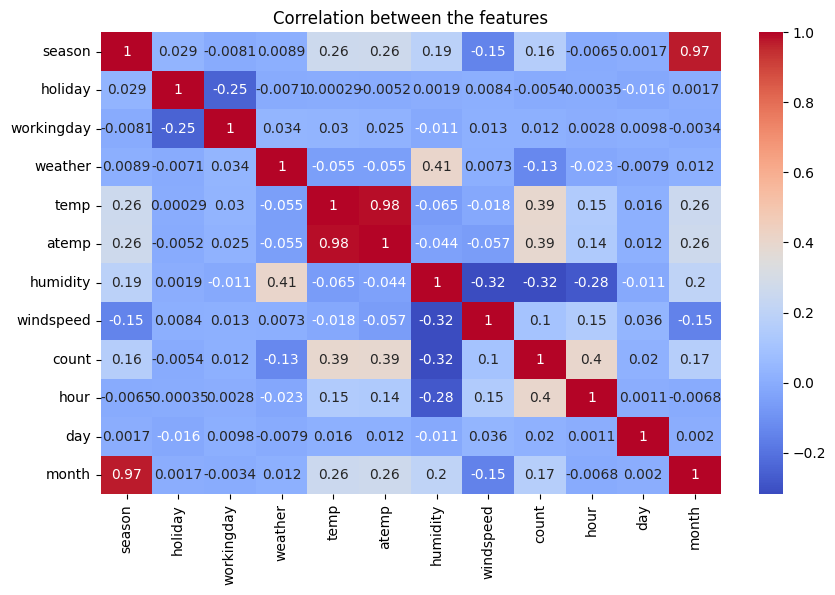

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(bike_data.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation between the features")
plt.show()


In [10]:
print(bike_data.corr()['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
hour          0.400601
day           0.019826
month         0.166862
Name: count, dtype: float64


In [11]:
x=bike_data.drop(columns=['count'])
y=bike_data['count']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
#RandomforestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(x_train,y_train)
y_predict = regressor.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
print('RMSE',rmse)

RMSE 66.41571363629077


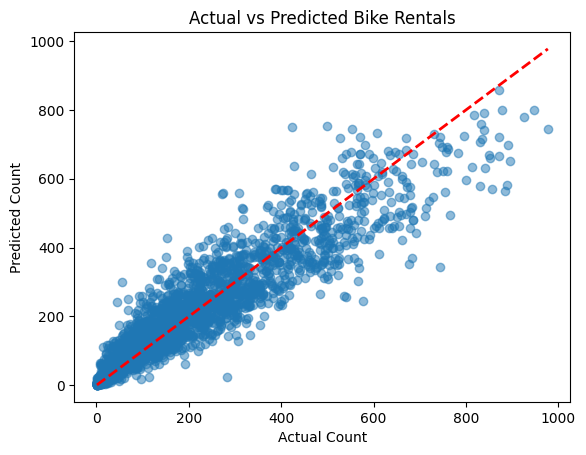

In [13]:
plt.scatter(y_test,y_predict,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)

plt.title("Actual vs Predicted Bike Rentals")
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

In [14]:
print('Feature Importances:',dict(zip(x.columns,regressor.feature_importances_)))

Feature Importances: {'season': np.float64(0.0179476955428471), 'holiday': np.float64(0.002641735148376755), 'workingday': np.float64(0.07905018121834267), 'weather': np.float64(0.018750866033777663), 'temp': np.float64(0.055155176215547226), 'atemp': np.float64(0.0905786852761182), 'humidity': np.float64(0.05117127355892379), 'windspeed': np.float64(0.027867692048416617), 'hour': np.float64(0.5883709798757514), 'day': np.float64(0.031310315329228164), 'month': np.float64(0.03715539975267045)}
